# Introduction

This notebook presents examples based upon the Hands on Machine Learning textbook by Geron covering chapter for on linear model training.

* [Linear Regression](#linear-regression) 
* [Polynomial Regression](#Polynomial-Regression)
* [Performance Analysis Using Learning Curves](#Performance-Analysis-Using-Learning-Curves)
* [Regularization Techniques](#Regularization-Techniques)
* [Boston Housing Regression Examples](#Boston-Housing-Regression-Examples) 
* [Logistic Regression and Softmax](#Logistic-Regression-and-Softmax)

# Linear Regression

This section demonstrates multiple regression types including: **Closed-form solutions**, **Batch Gradient Descent**, **Stochastic Gradient Descent**, and **Mini-batch Gradient Descent**.

## Demonstration Setup

In [1]:
# Includes
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline 

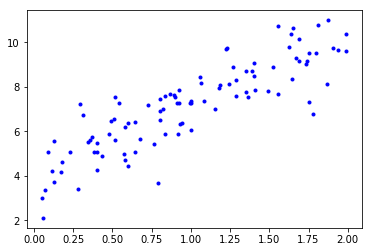

In [2]:
# Data Preparation
X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

# Plot the data
plt.plot(X,y, "b.")

In [3]:
def showProgress(i, X, y, theta):
    """
    Helper function to show progress by (a) printing current theta and (b) plotting current
    regression
    """
    print("Theta (i=" + str(i+1) + "): " + str(theta))
    
    # Predict on x=0 and x=2
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]
    y_predict = X_new_b.dot(theta)
    
    # Plot prediction
    plt.plot(X_new, y_predict)
    if (i==0): 
        plt.plot(X,y, "b.")

In [4]:
#####################################################################

## Linear Regression - Closed-Form Solution

This section shows the closed-form solution for linear regression.

Theta (i=1): [[4.12789599]
 [3.06816378]]
Predictions:
[[ 4.12789599]
 [ 5.66197788]
 [ 7.19605978]
 [ 8.73014167]
 [10.26422356]]


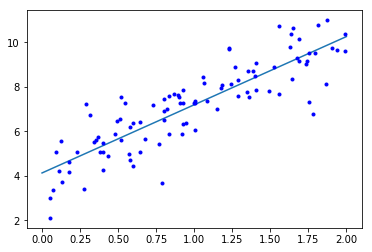

In [5]:
# Solve normal equation for theta
theta = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)

showProgress(0, X, y, theta)

# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)

print("Predictions:")
print(y_predict)

In [6]:
#####################################################################

## Linear Regression using Scikit-Learn

This shows how to use the built-in function within SKLearn to train a model.

Theta (i=1): [array([4.12789599]), array([[3.06816378]])]
Predictions:
[[ 4.12789599]
 [ 5.66197788]
 [ 7.19605978]
 [ 8.73014167]
 [10.26422356]]


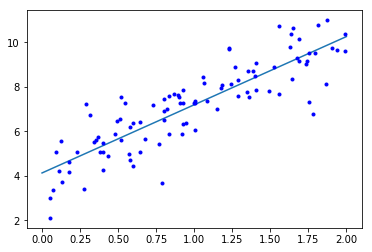

In [7]:
#  Create a linear regression and train it
lin_reg = LinearRegression()
lin_reg.fit(X,y)

theta = [lin_reg.intercept_, lin_reg.coef_]
showProgress(0, X, y, theta)

# Make a prediction using trained model
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = lin_reg.predict(X_new)

print("Predictions:")
print(y_predict)

In [8]:
#####################################################################

## Batch Linear Regression

This section presents the batch linear regression algorithm.

Theta (i=1): [[ 0.79375176]
 [-0.48139639]]
Theta (i=1): [[2.15706157]
 [1.07144657]]
Theta (i=2): [[2.94301658]
 [1.96365818]]
Theta (i=3): [[3.39671428]
 [2.47577456]]
Theta (i=4): [[3.65918695]
 [2.76921737]]
Theta (i=5): [[3.81158687]
 [2.93686889]]
Theta (i=6): [[3.90061087]
 [3.03217333]]
Theta (i=7): [[3.9531298 ]
 [3.08588192]]
Theta (i=8): [[3.98460645]
 [3.11568822]]
Theta (i=9): [[4.0039393 ]
 [3.13177234]]
Theta (i=10): [[4.01624961]
 [3.13999108]]
Theta (i=11): [[4.02448521]
 [3.14371363]]
Theta (i=12): [[4.03034327]
 [3.14487779]]
Theta (i=13): [[4.03480129]
 [3.14459779]]
Theta (i=14): [[4.03842264]
 [3.14351393]]
Theta (i=15): [[4.0415324 ]
 [3.14199391]]
Theta (i=16): [[4.04431846]
 [3.14024852]]
Theta (i=17): [[4.04688978]
 [3.13839833]]
Theta (i=18): [[4.04930987]
 [3.13651201]]
Theta (i=19): [[4.05161607]
 [3.13462839]]
Theta (i=20): [[4.05383062]
 [3.13276912]]
Theta (i=21): [[4.05596709]
 [3.13094603]]
Theta (i=22): [[4.05803398]
 [3.12916527]]
Theta (i=23): [[4.0

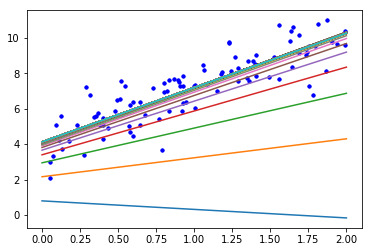

In [9]:
# Set algorithm parameters
eta = 0.1 
n_iterations = 10000
m = (len(X)) # number of inputs
epsilon = 0.00001

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

# Train Linear Model
for i in range(0,n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 2/m * XT.(X.theta - y)

    if np.mean(-gradients) < epsilon:
        break
    
    theta = theta - eta * gradients
    
    showProgress(i, X, y, theta)

In [10]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new] 

y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.12734453]
 [ 5.66166732]
 [ 7.1959901 ]
 [ 8.73031289]
 [10.26463567]]


In [11]:
#####################################################################

## Stochastic Gradient Descent

This section implements a stochastic gradient descent.

In [12]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[-0.02632321]
 [-0.29082184]]
Theta (i=1): [[3.93805262]
 [3.17603602]]
Theta (i=2): [[4.24841155]
 [3.20557041]]
Theta (i=3): [[4.15273296]
 [3.02688629]]
Theta (i=4): [[4.22902152]
 [2.80801112]]
Theta (i=5): [[4.18999199]
 [3.00531984]]
Theta (i=6): [[4.13252164]
 [2.95141681]]
Theta (i=7): [[4.22044151]
 [3.05981062]]
Theta (i=8): [[4.13424718]
 [3.03425258]]
Theta (i=9): [[4.12496514]
 [2.99203204]]
Theta (i=10): [[4.14295825]
 [3.0126947 ]]
Theta (i=11): [[4.13109185]
 [3.03436567]]
Theta (i=12): [[4.12922852]
 [3.01089419]]
Theta (i=13): [[4.09025979]
 [2.95195221]]
Theta (i=14): [[4.17364   ]
 [3.08465489]]
Theta (i=15): [[4.14340829]
 [3.07829699]]
Theta (i=16): [[4.11808169]
 [3.04308428]]
Theta (i=17): [[4.13084612]
 [3.05599227]]
Theta (i=18): [[4.11299565]
 [3.04127298]]
Theta (i=19): [[4.11396885]
 [3.06670441]]
Theta (i=20): [[4.10668721]
 [3.09072297]]
Theta (i=21): [[4.11719817]
 [3.11176562]]
Theta (i=22): [[4.09467836]
 [3.07756409]]
Theta (i=23): [[4.1

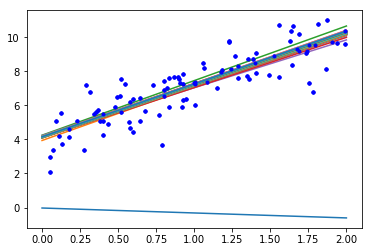

In [13]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 2 * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [14]:
# Predictions based upon theta
# Data
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]

# Prediction
y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.15608172]
 [ 5.70693488]
 [ 7.25778805]
 [ 8.80864122]
 [10.35949439]]


In [15]:
#####################################################################

## Mini-Batch Gradient Descent

Demonstrates an implementation of the mini-batch gradient descent.

In [16]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[-0.05346181]
 [-1.77730659]]
Theta (i=1): [[4.13119811]
 [3.16255761]]
Theta (i=2): [[4.11666379]
 [3.08174168]]
Theta (i=3): [[4.10529112]
 [3.0388122 ]]
Theta (i=4): [[4.13816998]
 [3.03584939]]
Theta (i=5): [[4.1539067 ]
 [3.08145625]]
Theta (i=6): [[4.15268537]
 [3.07778388]]
Theta (i=7): [[4.12814808]
 [3.07126131]]
Theta (i=8): [[4.19708835]
 [3.05544891]]
Theta (i=9): [[4.17056026]
 [3.05736113]]
Theta (i=10): [[4.17688362]
 [3.06221921]]
Theta (i=11): [[4.14896289]
 [3.04713082]]
Theta (i=12): [[4.15173671]
 [3.00693403]]
Theta (i=13): [[4.15161571]
 [3.02453109]]
Theta (i=14): [[4.1549099 ]
 [3.08102908]]
Theta (i=15): [[4.15302473]
 [3.07434898]]
Theta (i=16): [[4.13617107]
 [3.05998872]]
Theta (i=17): [[4.12432072]
 [3.04053455]]
Theta (i=18): [[4.1295152 ]
 [3.05288082]]
Theta (i=19): [[4.14813561]
 [3.0743125 ]]
Theta (i=20): [[4.15525775]
 [3.08049036]]
Theta (i=21): [[4.14714891]
 [3.08033154]]
Theta (i=22): [[4.13458288]
 [3.07356766]]
Theta (i=23): [[4.1

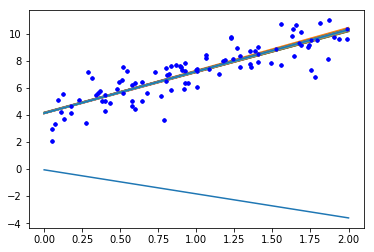

In [17]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

batch_size = 5 # b


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.arange(m) #array from 0 to m-1
        np.random.shuffle(rand_idx) #shuffle index arry

        xi = X_b[rand_idx[:batch_size]] #grab labels for first b rows
        yi = y[rand_idx[:batch_size]]   #grab labels for first b rows
        
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)  # 2/b * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [18]:
# Predictions based upon theta

# Data
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]

# Prediction
y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.12805809]
 [ 5.66967798]
 [ 7.21129788]
 [ 8.75291778]
 [10.29453767]]


In [19]:
#####################################################################
#####################################################################

# Polynomial Regression

Implements polynomial regression using the PolynomialFeatures function of sklearn.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

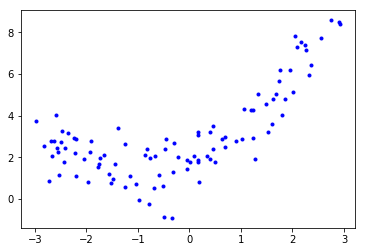

In [21]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

The following demonstrates the polynomial regression.  By changing the variable *degree* you can observe the change in the plot of the model.

Trained Theta:
[1.81048339] [[ 1.41462091e+00  5.53203005e-01 -5.64653354e-01 -2.32803130e-01
   2.05956326e-01  1.33814844e-01 -2.79515687e-02 -2.37355577e-02
   1.27141798e-03  1.30218124e-03]]


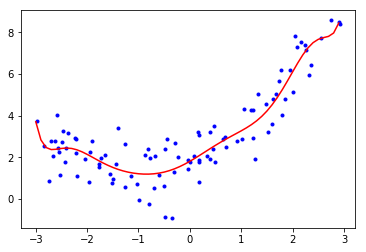

In [22]:
# Adjust degree to observe change in model
degree = 10

# Add extra features using PolynomialFeatures transform
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train the modified input data set.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("Trained Theta:")
print(lin_reg.intercept_, lin_reg.coef_)


# Prepare test data
x_test = [[0.1*x] for x in range(-30,30)]
test_X_poly = poly_features.fit_transform(x_test)

# Predict using test data
predict = lin_reg.predict(test_X_poly)

# Plot Scatter and Model
plt.plot(X,y,"b.")
plt.plot(x_test, predict,"r-")

# Performance Analysis Using Learning Curves

Demonstrated using Polynomial Regression examples.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [24]:
def plot_learning_curves(model, X, y):
    """
    Plots performance on the training set and testing (validation) set.
    X-axis - number of training samples used
    Y-axis - RMSE
    """
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)
    
    training_errors, validation_errors = [], []
    
    for m in range(1, len(train_X)):
        
        model.fit(train_X[:m], train_y[:m])
        
        train_pred = model.predict(train_X)
        test_pred = model.predict(test_X)
        
        training_errors.append(np.sqrt(mean_squared_error(train_y, train_pred)))
        validation_errors.append(np.sqrt(mean_squared_error(test_y, test_pred)))
        
    plt.plot(training_errors, "r-+", label="train")
    plt.plot(validation_errors, "b-", label="test")
    plt.legend()
    plt.axis([0, 80, 0, 3])     

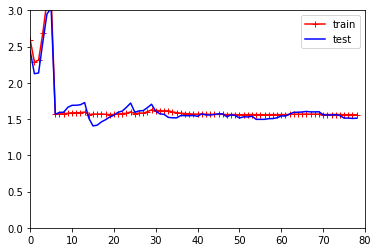

In [25]:
# Demonstrate our plot
plot_learning_curves(LinearRegression(), X, y)

Now, we can observe the performance of a polynomial regression algorithm.

Here, we use the Pipeline to first add the polynomial features and then perform a linear regression.  We can call this as a model in sklearn.

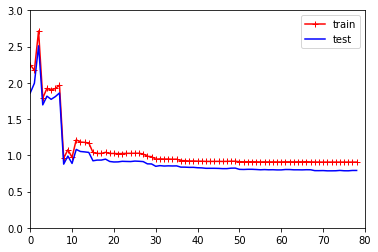

In [26]:
degree = 2

model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(model, X, y)

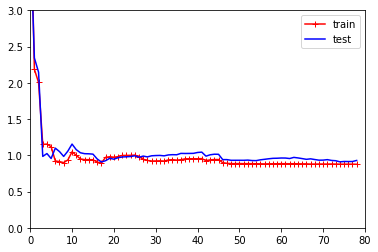

In [27]:
degree = 3

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

In [28]:
#####################################################################
#####################################################################

# Regularization Techniques

Regularizaton helps reduce the overfitting for regression algorithms.  Here, we are demonstrating three variations of the regression algorithms previously covered called **Ridge**, **Lasso**, and **Elastic Net** Regression.

## Ridge Regression

In [29]:
# New Includes
from sklearn.linear_model import Ridge, SGDRegressor

### Demonstration Data Set and Test Inputs

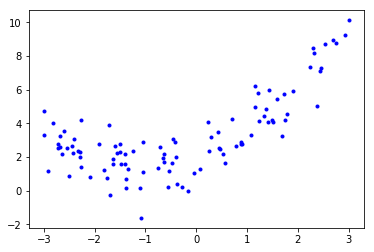

In [30]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

Closed-Form Approach using Ridge class w/ Cholesky solver (formulation of closed form solution for regression with ridge regularization)

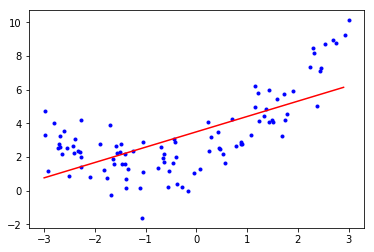

In [31]:
alpha = 0.8

# Build and Train
model = Ridge(alpha=alpha, solver="cholesky")
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Observe how our model changes as we adjust our alpha from 1 to 1000

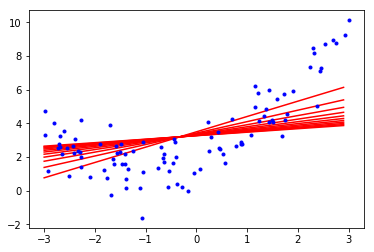

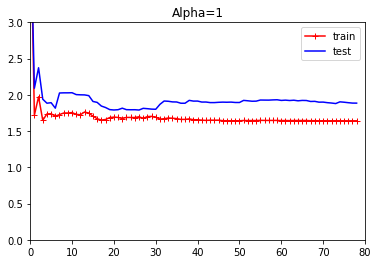

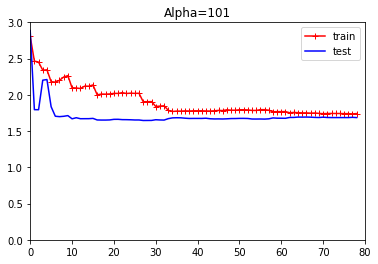

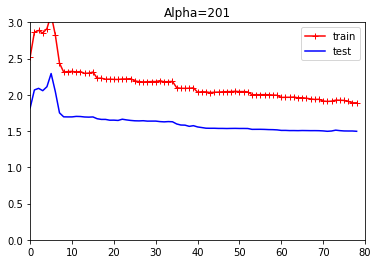

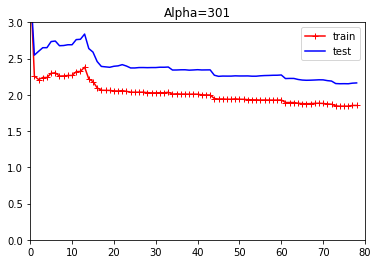

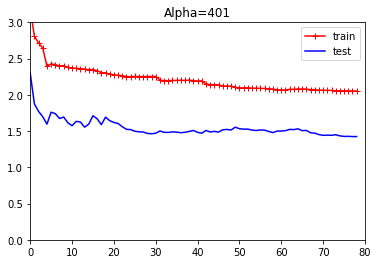

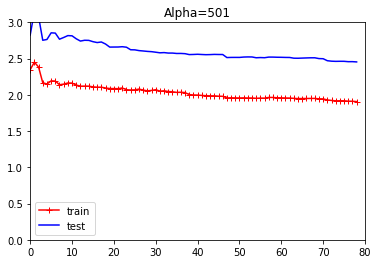

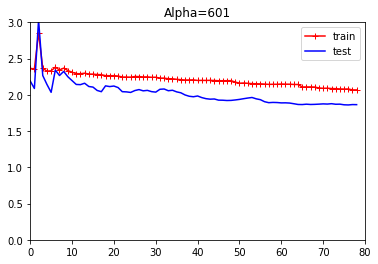

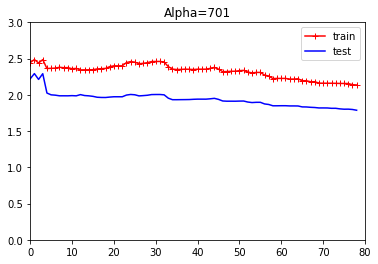

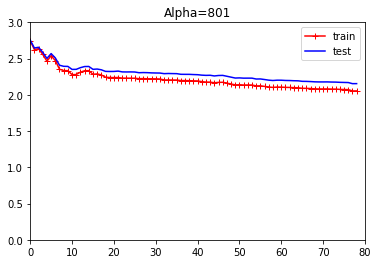

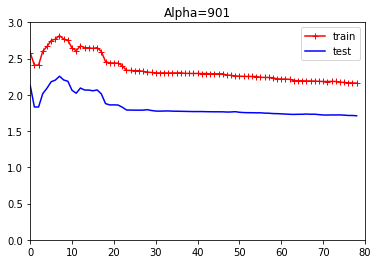

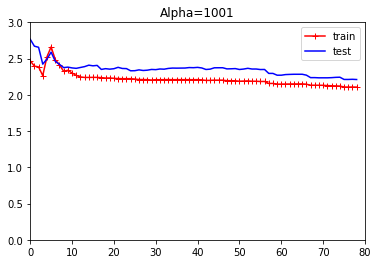

In [32]:
for a in range(0,1001,100):
    
    alpha = (a+1)
    
    model = Ridge(alpha=alpha, solver="cholesky")
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(alpha))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

The following snippet shows the impact of Ridge regularization on polynomial regression.

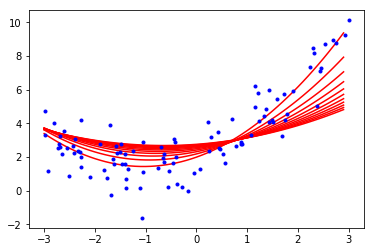

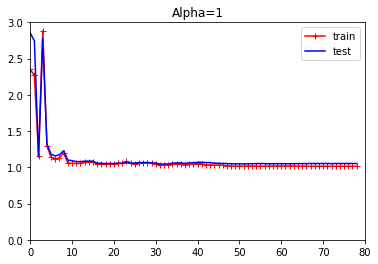

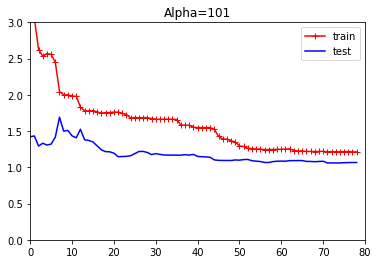

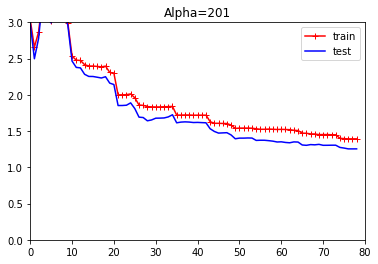

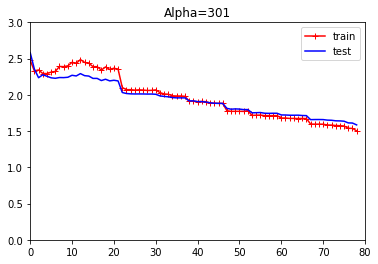

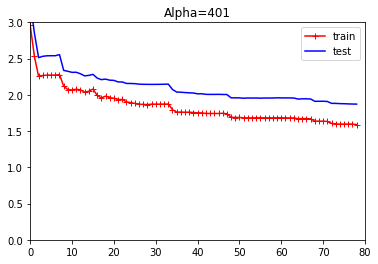

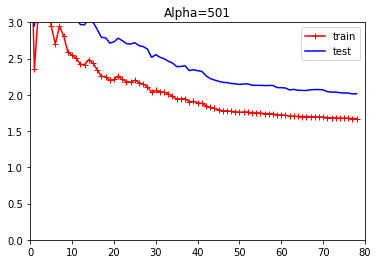

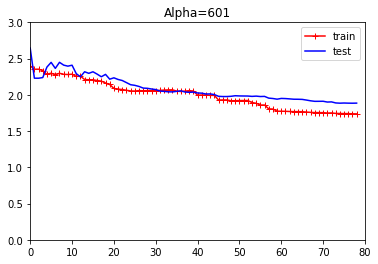

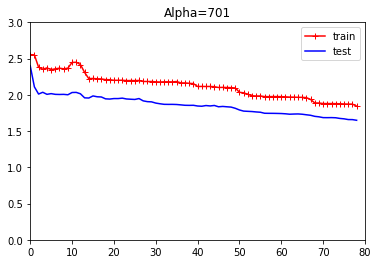

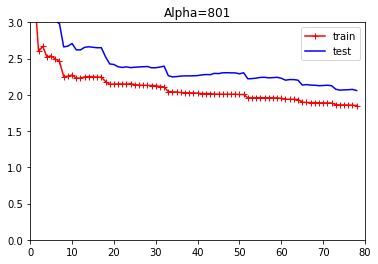

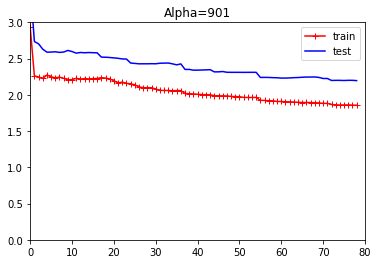

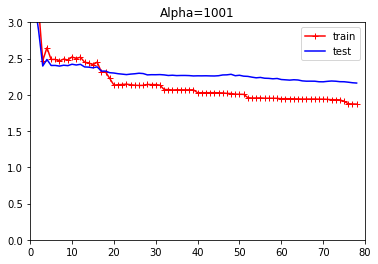

In [33]:
deg = 2
for a in range(0,1001,100):
    
    alpha = a+1
    
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
        ("Ridged", Ridge(alpha=alpha, solver="cholesky")),
        ])
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(alpha))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

### Stochastic Gradient Descent w/ Ridge Regression Enabled as L2 penalty

Using the stochastic gradient descent class in scikit-learn, we can apply the l2 penalty to achieve a Ridge Stochastic Regression.

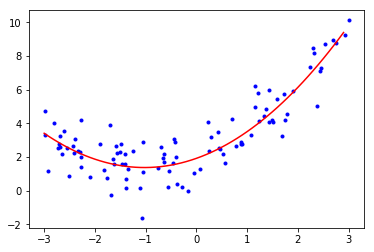

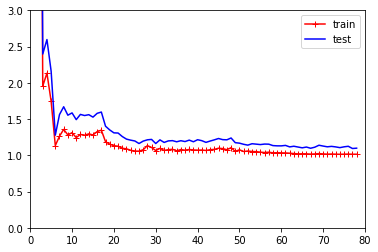

In [34]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD Ridge", SGDRegressor(penalty="l2", max_iter=100000, tol=0.00001)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

In [35]:
#####################################################################

## Lasso Regularization

Lasso regularization can be used to implement lasso regression using the l1 penalty as the term for the regularization factor.

In [36]:
# Includes
from sklearn.linear_model import Lasso

### Demonstration Data Set and Test Inputs

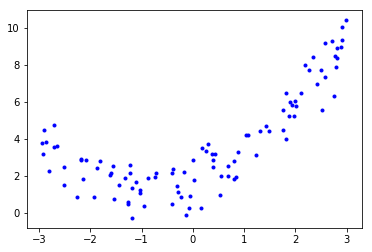

In [37]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

### Lasso Regression - Linear Example

This demonstrates the Linear Regression with Lasso Model using the Lasso class built into SkLearn

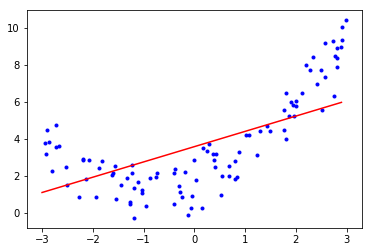

In [38]:
alpha = 0.8

# Build and Train
model = Lasso(alpha=alpha)
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

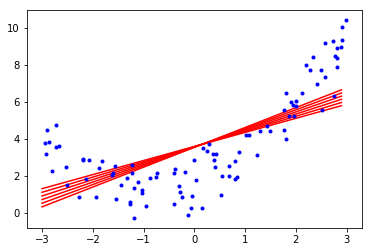

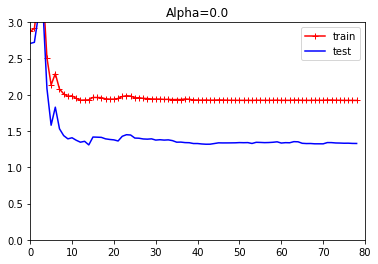

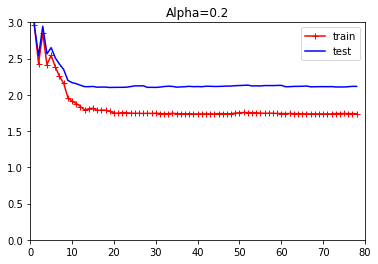

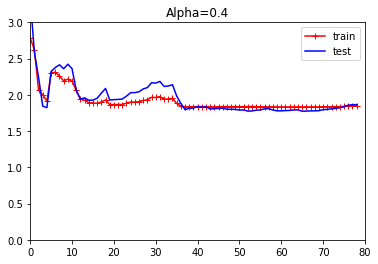

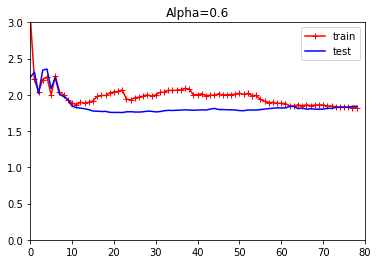

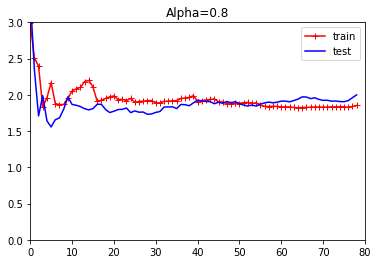

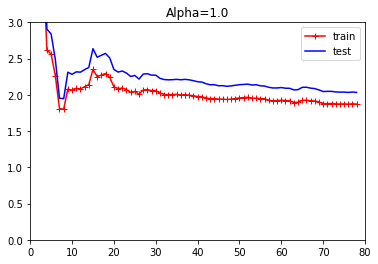

In [39]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Lasso(alpha=alpha)
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

### Lasso Regression - Polynomial Example

Now, we will change our model to a polynomial of a specified degreee.  We can then observe how our model is impacted as alpha is adjusted.

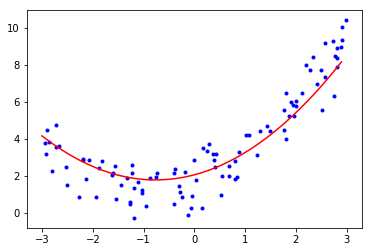

In [40]:
alpha = 0.8
deg = 2

# Build and Train
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Lasso", Lasso(alpha=alpha)),
    ])
    
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

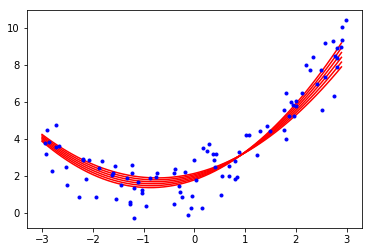

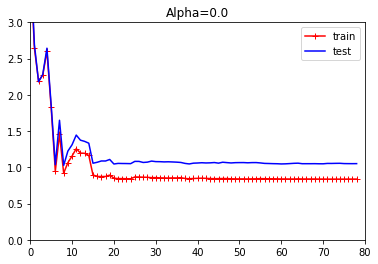

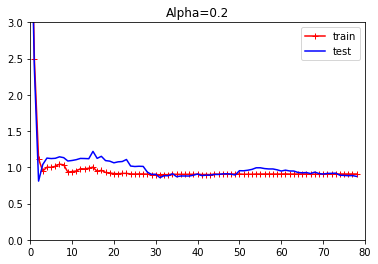

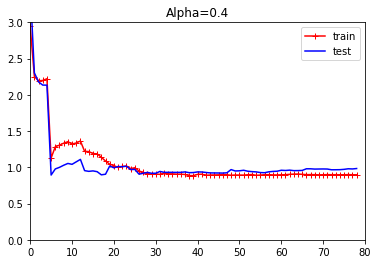

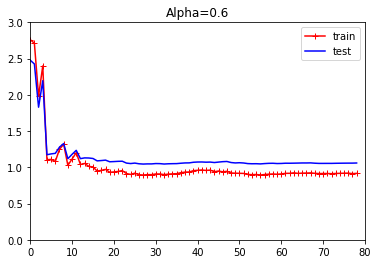

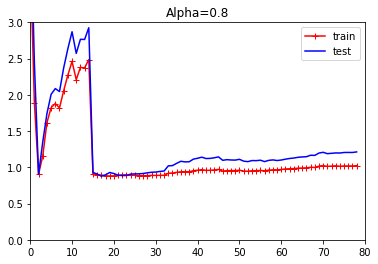

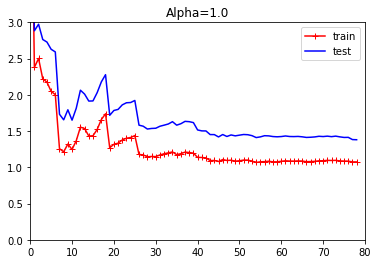

In [41]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Lasso", Lasso(alpha=alpha)),
    ])
    
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())
    
plt.figure(0)
plt.plot(X,y,"b.")

### Lasso Regression - Stochastic Gradient Descent Example

Now, we will utilize steepest gradient descent with an l1 penalty to implement our lasso regression.  For our example, we will use a polynomial model.

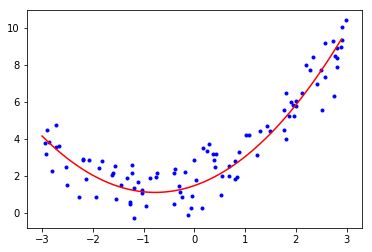

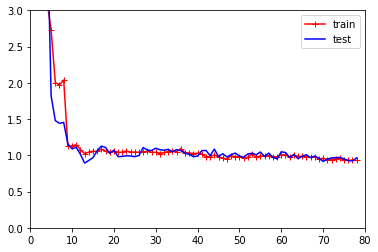

In [42]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD Lasso", SGDRegressor(penalty="l1", max_iter=1000, tol=0.01)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

In [43]:
#####################################################################

## Elastic Net Regularization

Elastic Net blends Ridge and Lasso regularization techniques.

In [44]:
# Includes
from sklearn.linear_model import ElasticNet

### Demonstration Data Set and Test Inputs

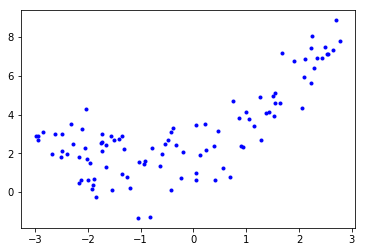

In [45]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

### Elastic Net Regression - Linear Example

This demonstrates the Linear Regression with Lasso Model using the Lasso class built into SkLearn

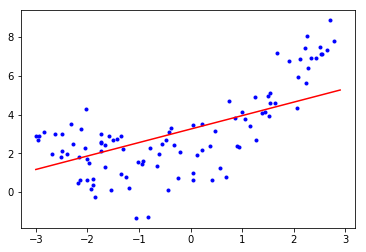

In [46]:
alpha = 0.8

# Build and Train
model = ElasticNet(alpha=alpha)
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

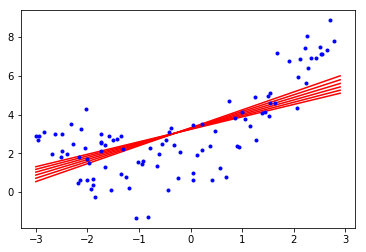

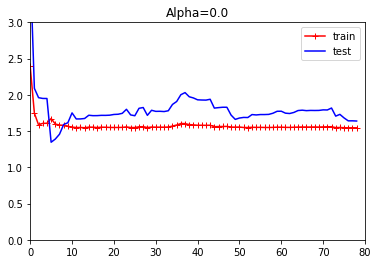

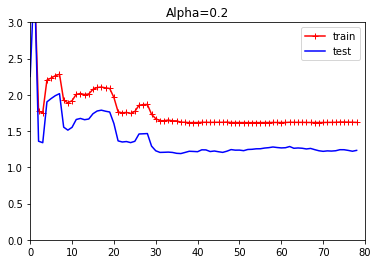

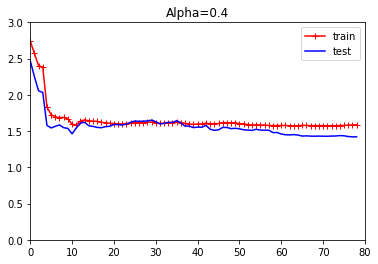

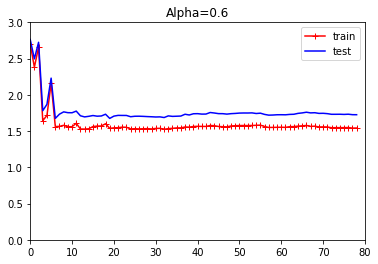

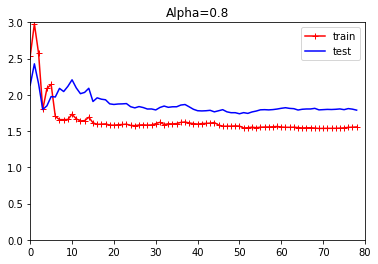

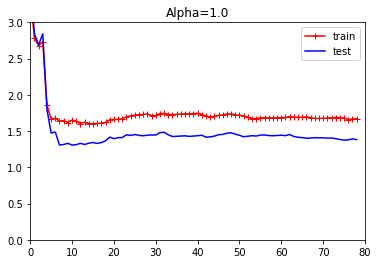

In [47]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = ElasticNet(alpha=alpha)
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

### Elastic Net Regression - Polynomial Example

Now, we will change our model to a polynomial of a specified degreee.  We can then observe how our model is impacted as alpha is adjusted.

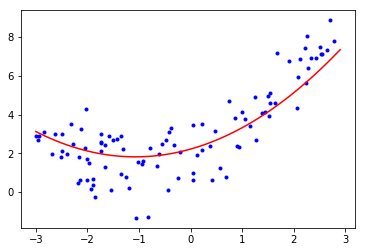

In [48]:
alpha = 0.8
deg = 2

# Build and Train
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Elastic", ElasticNet(alpha=alpha)),
    ])
    
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

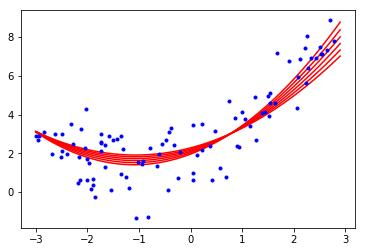

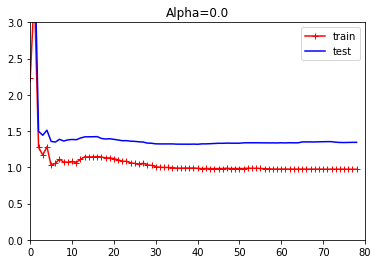

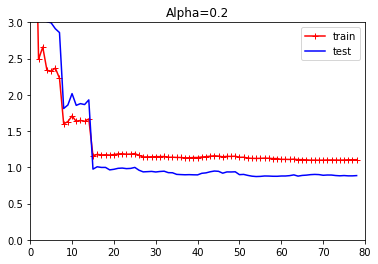

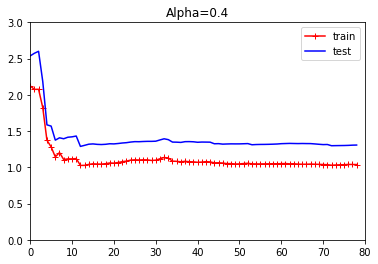

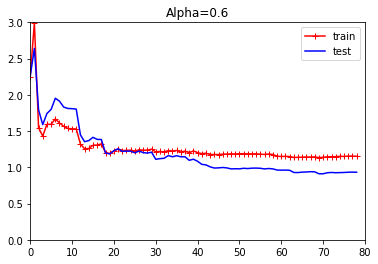

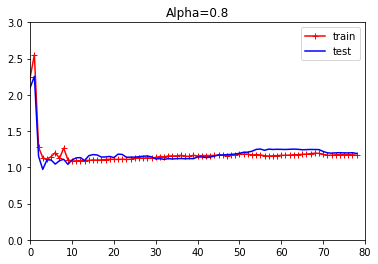

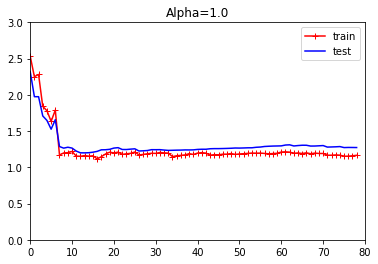

In [49]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Elastic", ElasticNet(alpha=alpha)),
    ])
    
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())
    
plt.figure(0)
plt.plot(X,y,"b.")

### Elastic Net Regression - Stochastic Gradient Descent Example

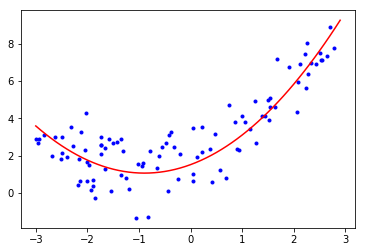

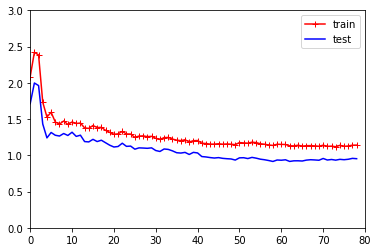

In [50]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD ElasticNet", SGDRegressor(penalty="elasticnet", max_iter=1000, tol=0.01)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

In [51]:
#####################################################################
#####################################################################

## Boston Housing Regression Examples

Dataset User Guide: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
Dataset API Info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston


   * CRIM per capita crime rate by town
   * ZN proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS proportion of non-retail business acres per town
   * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX nitric oxides concentration (parts per 10 million)
   * RM average number of rooms per dwelling
   * AGE proportion of owner-occupied units built prior to 1940
   * DIS weighted distances to five Boston employment centres
   * RAD index of accessibility to radial highways
   * TAX full-value property-tax rate per \$10,000
   * PTRATIO pupil-teacher ratio by town
   * B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * LSTAT % lower status of the population
   * MEDV Median value of owner-occupied homes in \$1000’s


In [52]:
# New Includes
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017197AF5C18>,
      dtype=object)

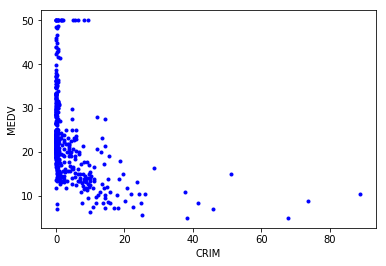

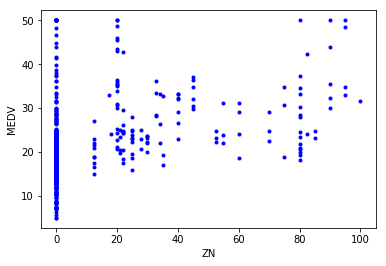

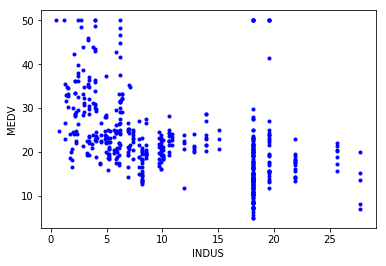

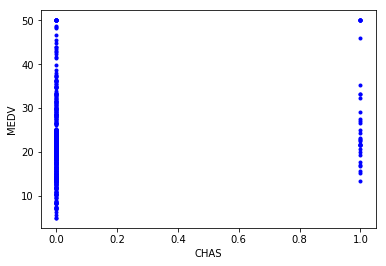

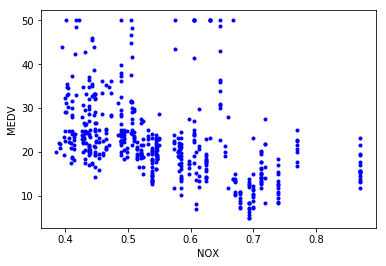

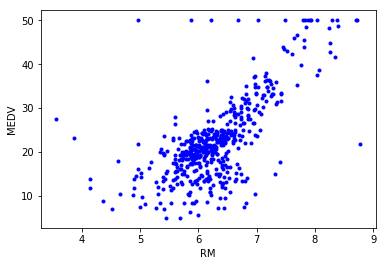

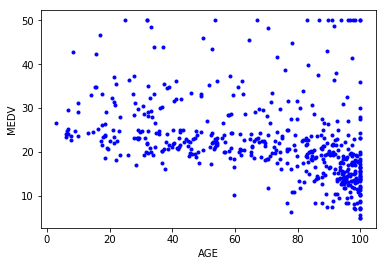

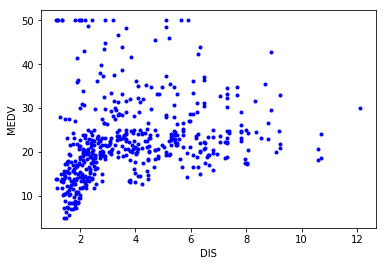

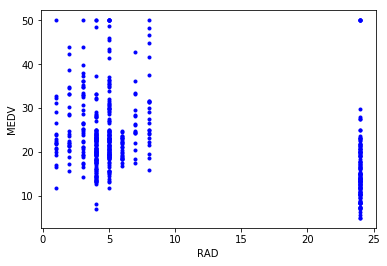

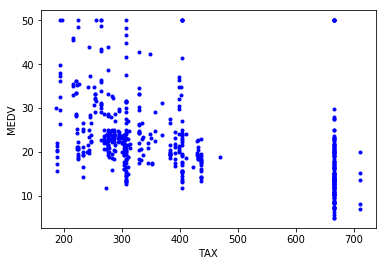

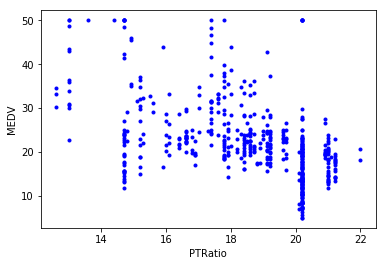

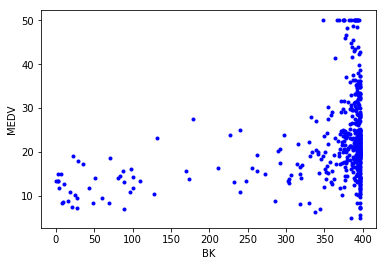

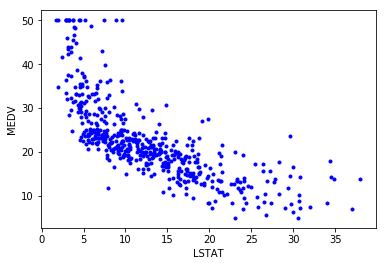

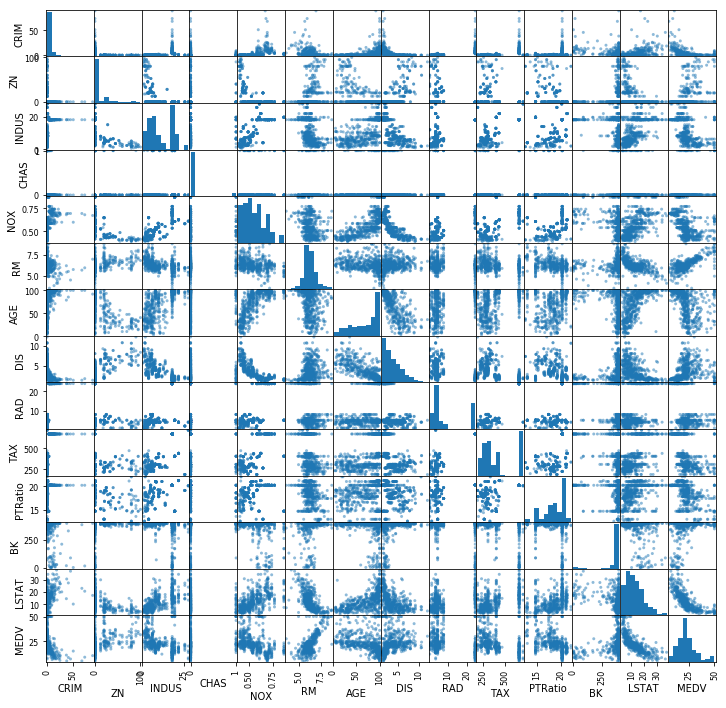

In [53]:
# Load Data Set
boston_housing_data = datasets.load_boston()

# Build data frame for visualization
boston_df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

# Plot relationship between each attribute and MEDV
for column in boston_df.columns:
    
    if column == "MEDV": continue
    
    plt.figure(column)
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.plot(boston_df[column], boston_df["MEDV"], "b.")

scatter_matrix(boston_df, figsize=(12, 12))

In [54]:
# Data Preparation
scaler = StandardScaler()
boston_data_set = scaler.fit_transform(boston_housing_data.data)
train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

Now, let's see how well we can model the boston housing data using a linear regressino function built into sklearn.

Theta:
22.370962796110927 [-1.17882592  0.94194775  0.99538443  0.31633103 -2.42221903  2.29379751
  0.30536438 -3.28168206  3.18784177 -2.74507034 -2.19936126  0.79806381
 -4.51045035]
Mean error: 3.612663605279624


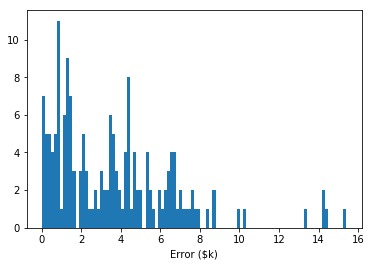

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("Mean error: " + str(mean_absolute_error(test_y, pred_y)))

Next, we can observe the performance of a stochastic gradient regressor model **without any regularization.**

Theta:
[22.33069817] [-1.0602064   0.52932109  0.07883479  0.38857144 -1.98745021  2.41325098
  0.20784688 -2.90721959  1.6774345  -0.82529815 -2.14744258  0.80729756
 -4.51720666]


3.47531162414551

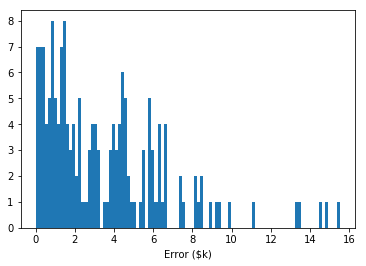

In [56]:
lin_reg = SGDRegressor(penalty="none", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Next, we can observe the performance of a gradient regressor model **with ridge regularization.**

Theta:
22.397771030966123 [-0.68819164  0.24474207 -0.27798626  0.55056262 -0.83262478  2.48425222
 -0.11141912 -1.3979693   0.44358825 -0.3935259  -1.60857276  0.71516997
 -3.12871575]


3.354164314230193

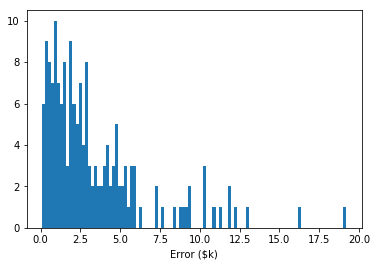

In [57]:
lin_reg = Ridge(alpha=100)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Next, we can observe the performance of a gradient regressor model **with lasso regularization.**

Theta:
22.33607639427997 [-0.4566265   0.         -0.          0.27753995 -0.97375118  2.60780349
  0.         -1.81640453  0.18418135 -0.         -1.76096542  0.61227787
 -4.47335224]


3.55471445431831

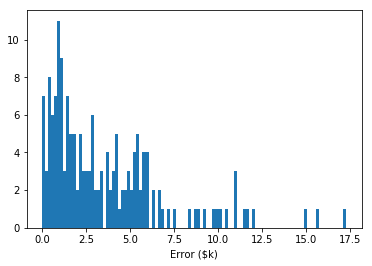

In [58]:
lin_reg = Lasso(alpha=0.2)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Finally, let's observe performance with the elasticnet regression algorithm.

Theta:
22.39696022404863 [-0.45381265  0.         -0.09600764  0.37691635 -0.54157062  2.49892563
 -0.         -0.77079899  0.         -0.0882097  -1.51567446  0.57596154
 -3.25624955]


3.524562639603973

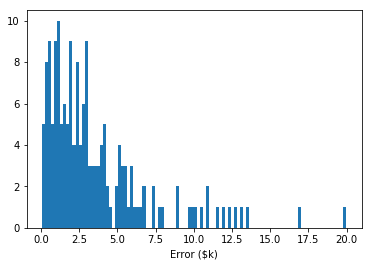

In [59]:
lin_reg = ElasticNet(alpha=0.5)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Let's examine how the algorithm performs if we reduce the number of features based upon some of intiutions from viewing the data earlier.

In [60]:
# Prepare the new data set

attributes = ["AGE","RM","LSTAT"]

boston_data_set = boston_df[attributes]
boston_data_set = scaler.fit_transform(boston_housing_data.data)
train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

Theta:
22.628736096471638 [-0.83745581  0.82318362  0.35109083  0.57454174 -1.90401099  2.595432
  0.03353612 -2.92472791  2.34710728 -1.89339045 -2.15161682  0.52571078
 -4.44443195]


3.0120501660025556

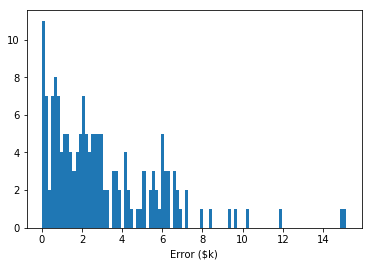

In [61]:
# Linear Regression Demo

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Theta:
[22.62639876] [-0.77926486  0.71759618  0.0775358   0.61720656 -1.74303692  2.57120718
  0.01871437 -2.887221    1.78040905 -1.24044248 -2.07354557  0.50410387
 -4.40227722]


3.0046220285567977

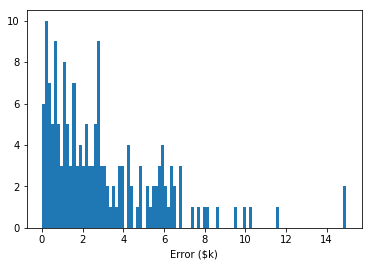

In [62]:
lin_reg = SGDRegressor(penalty="none", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Theta:
22.643028977248832 [-0.63094284  0.33937122 -0.40560842  0.60901509 -0.68554386  2.69770296
 -0.17063491 -1.33092983  0.48901995 -0.51969773 -1.63521871  0.52808548
 -3.09649873]


3.0600259321733456

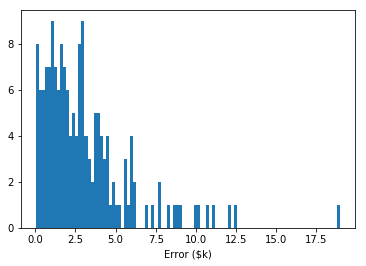

In [63]:
lin_reg = Ridge(alpha=100)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Theta:
22.596469626786188 [-0.40454317  0.05515312 -0.          0.52791852 -0.88242286  2.8167771
 -0.         -1.5779862   0.         -0.         -1.86358271  0.28382975
 -4.44981946]


3.2323147159313383

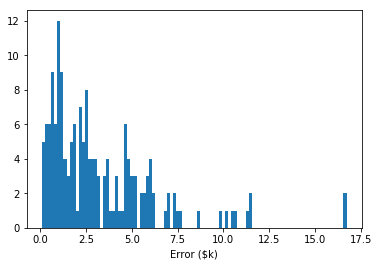

In [64]:
lin_reg = Lasso(alpha=0.2)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

Theta:
22.621033612865585 [-0.53027241  0.20529978 -0.18793832  0.55979808 -0.7660656   2.82052484
 -0.         -1.36969602  0.26544867 -0.29430582 -1.74423862  0.41988466
 -3.70334364]


3.1042639079872707

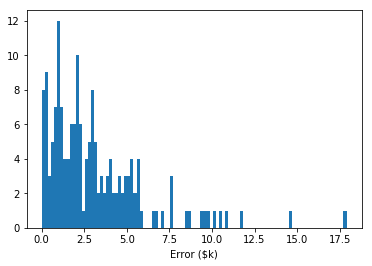

In [65]:
lin_reg = ElasticNet(alpha=0.25)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

In [66]:
#####################################################################
#####################################################################

# Logistic Regression and Softmax

Logistic regression and softmax handle binary classification and multi-class classification, respectively.

In [67]:
from sklearn.linear_model import LogisticRegression

Observe the following plot of the logistic function.  As its input moves away from 0.5 it quickly outputs 1 or 0.

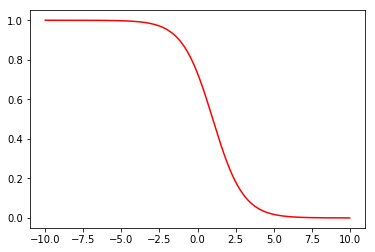

In [68]:
# Plot Logistic Function

t = np.array([0.01*x for x in range(-1000,1000)])
logit = 1 / (1 + np.exp(t-1))
plt.plot(t,logit,'r-')


We shall use the Iris data set to demonstrate the logistic and softmax regression algorithms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171978C5F98>,
      dtype=object)

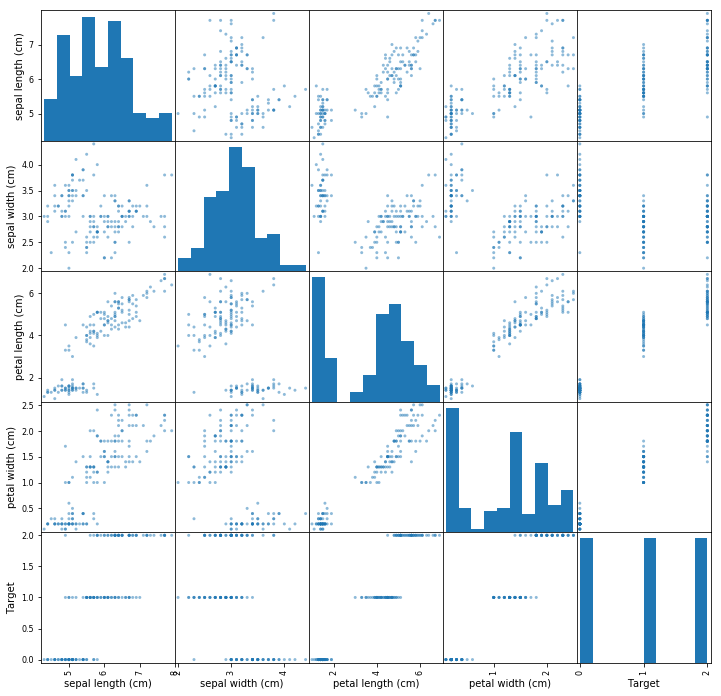

In [69]:
# Load Iris Data Set
iris = datasets.load_iris()

categories = list(iris.feature_names)
categories.append("Target")
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=categories)

iris_df.describe()
scatter_matrix(iris_df, figsize=(12, 12))

The following example shows a binary classification using the logistic function to determine if a particular flower is a virginica based upon solely its petal width.

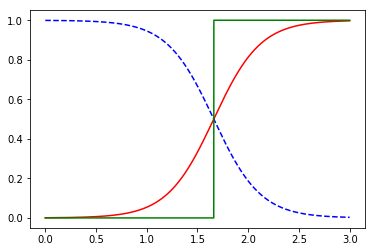

In [70]:
# Classify if virginica or not

# Prepare Data
X = iris["data"][:,3].reshape(-1,1) # formats the petal width column from the data set
y = (iris["target"] == 2).astype(np.int) # only virginica is true (1)

# build model
model = LogisticRegression(solver="lbfgs")
model.fit(X,y)

# Determine probability curves for for x from 0 to 3.
X_test = np.linspace(0,3,10000).reshape(-1,1)
y_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Plot probability curves and prediction curves.
plt.figure("Probabilities from logistic.")
plt.plot(X_test, y_proba[:,1], "r-")
plt.plot(X_test, y_proba[:,0], "b--")
plt.plot(X_test, y_pred, "g-")

Now observe the algorithm's performance via a confusion matrix from a 10-fold cross-validation test.

In [71]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X, y, cv=10)


print(confusion_matrix(y, y_pred))
print("Pecision Score = " + str(precision_score(y, y_pred)))
print("Recall Score = " + str(recall_score(y,y_pred)))
print("F1 Score = " + str(f1_score(y,y_pred)))

[[98  2]
 [ 4 46]]
Pecision Score = 0.9583333333333334
Recall Score = 0.92
F1 Score = 0.9387755102040817


Now, observe the multi-class classification across all flower types using the petal width and length as our inputs.

In [72]:
X = iris["data"][:,(2,3)]
y = iris["target"]

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
model.fit(X,y)

# Test the classifier
print(model.predict([[5,2],[1,3]]))
print(iris.target_names)

[2 0]
['setosa' 'versicolor' 'virginica']


Examine our classifier's confusion matrix.  It is performing quite well for our inputs.

In [73]:
y_pred = cross_val_predict(model, X, y, cv=10)


print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
